# AFS 505 Spring 2023, Unit 2 Project



## Background

This project will cover all aspects of the Data Analytics with Python unit.  To complete the project, follow the instructions at each step in the notebook and add Python code or written explanations as instructed.   Some tasks below will require you to answer with a written response rather than writing code.  Those tasks begin with the words "Explain" or "Write".


## Due Dates

This project requires knoweldge gained throughout the unit. However, waiting until the end of the unit make this project overwhelming.  Instead, as we cover the material required for different sections you are required to check-in the project. This ensures continued progress throuhgout the unit.

Project Check-in dates are 
- Thursday March 2, Sections 1-3
- Thursday March 9, Section 4
- Thursday March 23, Sections 5-6
- Thursday March 31, Completed Project



## How to turn in 
***DO NOT*** sumbit this poject to your GitHub repository.  Instead you will need to submit your check-ins via Canvas.


## Grading
Submission of the project on the check-in dates is worth 5 points per check-in. The prescribed sections must be fully completed, but they need not be correct.   Because grading in this course is subtractive, you only lose points if you do not check-in the project.  After final completion, the project will be graded for completeness and accuracy.  An accurate project is worth 25 points towards your grade.


## Data Introducution

To complete this project you will need to retrieve the "Cover Type Dataset" available at the UC Irvine Machine Learning Repository. You can find information about the dataset as well as the data [here](https://archive.ics.uci.edu/ml/datasets/Covertype).  To download the data, click the link at the top that reads **Data Folder**.  On the resulting page you will find three files for download.  Please download the file named `covtype.data.gz`, and use your preferred decompression utility to uncompress the file.  

Before you can begin with this project, you must familarize yourself with the data.  Please read the `convtype.info` file that is also available for download.  You can either download the file and open with your favorite text editor or [view it in the web browser](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).

In Summary:

> Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  **One method of obtaining this information is through the use of predictive models.**  

> [The purpose of this dataset is for] predicting forest cover type from cartographic variables... The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data... Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 



Here are some hints to help explain some of the data columns:

- Slope:  The angle in degrees of the slope on which the forest cover is growing.  
- Aspect:  The direction the slope is facing in degrees azimuth:  North = 0, East = 90, South = 180, West = 270.
- The columns representing shade contain values from 0 to 255 with 0 meaning no sun and 255 meaning full sun.
- There are 40 columns representing differnet soil types.  See the `convtype.info` file for a listing of these types.  The observations in these 40 columns indicate if cover was: absent = 0, present = 1
- There are 4 columns representing 4 different wilderness areas. The observations in these 4 columns indicate if cover was:  absent = 0, present = 1



## Objective
For this project you will utilize Numpy, Pandas, Matplotlib, Seaborn and Sklearn to create a Supervised Machine learning model that can assist natural resouce managers predict tree cover in neighboring lands.
 


## Tips
1. If you feel that your solution in a cell is too complicated, it probably is.  Check the online documentation and expect there may be shortcuts to do what you want.
2. If you encounter Memory Error or the notebook seems to not execute, you may need to restart the Kernel and re-run the cells.
3. Please contact the instructor if you have questions about this project.  You may ask any question you want!
4. Before turning in your notebook carefully re-read each step to ensure you've followed it correctly.


## Academic Honesty
You must work on your own to complete this project.  You should not work on this project together with other students. If you have questions please ask the instructurs or post them to the Slack channel where every student can see your question and benefit from any answers. You may consult the notebooks provided to you for the class or the online documentation for any of the tools (e.g. Numpy, Pandas, Seaborn, or Sklearn). 

---
## 1. Setup the Notebook
**1a.** Load all the necessary packages and libraries required for the entire notebook using the following (5 pts).

In [1]:
%matplotlib inline

# Import numpy and panda
import numpy as np
import pandas as pd

# Import plot related packages
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning packages
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

---
## 2. Import the data
**2a.** First, import the data. Note, it does not have any headers. This is a large dataset so it may  take a minute to load (3 pts).

In [2]:
data = pd.read_csv("covtype.data", header=None) # Read in the data

**2b.** Display the first 10 lines of the data (3 pts).

In [3]:
data.head(10) # display the first 10 rows of the data

0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   
5  2579  132   6  300  -15    67  230  237  140  6031  ...   0   0   0   0   
6  2606   45   7  270    5   633  222  225  138  6256  ...   0   0   0   0   
7  2605   49   4  234    7   573  222  230  144  6228  ...   0   0   0   0   
8  2617   45   9  240   56   666  223  221  133  6244  ...   0   0   0   0   
9  2612   59  10  247   11   636  228  219  124  6230  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  
5   0   0   0   0   0   2  
6   0   0   0   0   0   5  
7   0   0   0   0   0   5  
8   0   0   0   0   0   5  
9   0   0   0   0   0   5  

[10 rows x 55 columns]

**2c.** Add appropriate headers to the data frame, using the following array:

```python
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
```
(3 pts)

In [4]:
data.columns =  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]


**2d.** Display the first 10 lines of data again to confirm the headers are present (3 pts).

In [5]:
data.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ...  ST32  ST33  ST34  ST35  ST36  \
0                                6279  ...     0     0     0     0     0   
1                                6225  ...     0     0     0     0     0   
2                                6121  ...     0     0     0     0     0   
3                                6211  ...     0     0     0     0     0   
4                                6172  ...     0     0     0     0     0   
5                                6031  ...     0     0     0     0     0   
6                                6256  ...     0     0     0     0     0   
7                                6228  ...     0     0     0     0     0   
8                                6244  ...     0     0     0     0     0   
9                                6230  ...     0     0     0     0     0   

   ST37  ST38  ST39  ST40  Cover_Type  
0     0     0     0     0           5  
1     0     0     0     0           5  
2     0     0     0     0           2  
3     0     0     0     0           2  
4     0     0     0     0           5  
5     0     0     0     0           2  
6     0     0     0     0           5  
7     0     0     0     0           5  
8     0     0     0     0           5  
9     0     0     0     0           5  

[10 rows x 55 columns]

---
## 3. Explore the Data
**3a.** Show the dimensions of the data (3 pts).

In [6]:
data.shape

(581012, 55)

**3b.** Show the datatypes of all of the columns in the data (3 pts).

In [7]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Rawah                                 int64
Neota                                 int64
Comanche_Peak                         int64
Cache_la_Poudre                       int64
ST1                                   int64
ST2                                   int64
ST3                                   int64
ST4                                   int64
ST5                                   int64
ST6                                   int64
ST7                                   int64
ST8                                   int64
ST9                             

**3c.** Show if the dataset has any missing values (3 pts).

In [8]:
data.isna().sum() # show how many missing values per columns

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Rawah                                 0
Neota                                 0
Comanche_Peak                         0
Cache_la_Poudre                       0
ST1                                   0
ST2                                   0
ST3                                   0
ST4                                   0
ST5                                   0
ST6                                   0
ST7                                   0
ST8                                   0
ST9                                   0
ST10                                  0
ST11                                  0


**3d.** Show how many rows of data are duplicated (3 pts).

In [9]:
data.duplicated().sum()

0

**3e.** Show how many unique values there are per column (3 pts).

In [10]:
data.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Rawah                                    2
Neota                                    2
Comanche_Peak                            2
Cache_la_Poudre                          2
ST1                                      2
ST2                                      2
ST3                                      2
ST4                                      2
ST5                                      2
ST6                                      2
ST7                                      2
ST8                                      2
ST9                                      2
ST10       

---
## 4. Clean the Data
### 4.1. Missing Values
**4a.** If the dataset had missing values, determine if you need to clean the data. If so, show the code below. If you do not perform any cleaning indicate why (change the cell to "raw" type to write your explanation)  (3 pts).

**Answer:** The data has no missing values and therefore there is no need to clean it

### 4.2 Duplicated Data
**4b.** If the dataset had duplicated values, determine if you need to clean the data. If so, show the code below. If not, describe the status of duplicated data in this dataset (change the cell to "raw" type to write your explanation)  (3 pts).

**Answer:** The data has no duplicated values and therefore there is no need to clean it

**4c.** Explain if the unique number of values or each of the categorical columns (non numeric and non binary) match what is expected based on the description of the data  (3 pts).

**Answer:** From what we know about the data, the main categories are: 1) Soil type columns (40 columns), 2) Wilderness area (4 columns) and 3) Cover type. For soil type and wilderness area columns, each of the potential classifications has its own column and there are either zeros or ones. Zeros mean that the classification was absent and one means it was present. Thus, having only 2 unique values for these columns makes sense. Regarding the cover type, we have 7 unique values where each of them are mapped to a Cover Type Class. Having 7 unique values makes sense as well. 

### 4.3 Fix Categorical Data
Some of the columns are categorical (i.e. qualitative).  Remember, just becauase a column contains numbers does not mean it is quantitative. In the online description of the data, the authors stated that the soil types and wilderness areas are qualitative (categorical). You must decide if this is true given the dataset.

**4d.** Write the names of the columns that are categorical (3 pts).

In [11]:
categorical_columns = ['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40']
print(categorical_columns)
# Note Cover Type is not included because we take care of it in the next section

['Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10', 'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20', 'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30', 'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40']


**4e.** Change all categorical columns that were imported as a numeric type to a string type  (3 pts).

In [12]:
data[categorical_columns] = data[categorical_columns].astype(str)

**4f.** Confirm that all categorical columns are no longer numeric (3 pts).

In [13]:
data.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Rawah                                 object
Neota                                 object
Comanche_Peak                         object
Cache_la_Poudre                       object
ST1                                   object
ST2                                   object
ST3                                   object
ST4                                   object
ST5                                   object
ST6                                   object
ST7                                   object
ST8                                   object
ST9       

**4g.** The `Cover_Type` column is a string but appears numeric, and each number represents a unique class of trees. Convert the numeric values to their corresponding string representations. Print the top 10 entries to confirm your replacement worked (5 pts).

In [14]:
types = pd.Series(np.zeros(data.shape[0]))
types[(data['Cover_Type'] == 1)] = 'Spruce/Fir'
types[(data['Cover_Type'] == 2)] = 'Lodgepole Pine'
types[(data['Cover_Type'] == 3)] = 'Ponderosa Pine'
types[(data['Cover_Type'] == 4)] = 'Cottonwood/Willow'
types[(data['Cover_Type'] == 5)] = 'Aspen'
types[(data['Cover_Type'] == 6)] = 'Douglas-fir'
types[(data['Cover_Type'] == 7)] = 'Krummholz'


In [15]:
data['Cover_Type'] = types

In [16]:
data.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ... ST32 ST33 ST34 ST35 ST36 ST37 ST38  \
0                                6279  ...    0    0    0    0    0    0    0   
1                                6225  ...    0    0    0    0    0    0    0   
2                                6121  ...    0    0    0    0    0    0    0   
3                                6211  ...    0    0    0    0    0    0    0   
4                                6172  ...    0    0    0    0    0    0    0   
5                                6031  ...    0    0    0    0    0    0    0   
6                                6256  ...    0    0    0    0    0    0    0   
7                                6228  ...    0    0    0    0    0    0    0   
8                                6244  ...    0    0    0    0    0    0    0   
9                                6230  ...    0    0    0    0    0    0    0   

  ST39 ST40      Cover_Type  
0    0    0           Aspen  
1    0    0           Aspen  
2    0    0  Lodgepole Pine  
3    0    0  Lodgepole Pine  
4    0    0           Aspen  
5    0    0  Lodgepole Pine  
6    0    0           Aspen  
7    0    0           Aspen  
8    0    0           Aspen  
9    0    0           Aspen  

[10 rows x 55 columns]

### 4.4 Subset the Data
The dataset is a bit large for this notebook. It will consume too much RAM on your computer.  If we were executing this on a computer with more RAM we might just write a Python script to do the work rather than use a Jupyter notebook.  To reduce the dataset we should subset our data to save resources. 

**4h.** Before we subset the data, let's explore the number of samples per cover type.  For the `Cover_type` column, show the counts of each type of cover, and sort the results from largest to smallest (5 pts).

In [17]:
data['Cover_Type'].value_counts().sort_values(ascending=False)

Lodgepole Pine       283301
Spruce/Fir           211840
Ponderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: Cover_Type, dtype: int64

**4i.**  The results of the previous cell show that the number of measurements per cover type is imbalanced with the smallest having 2,747 observations and the largest 283,301.  Let's subset the data to only include 2,000 randomly selected samples from each cover type.   We have not covered in class how to do this, so below is a code sample you can use. 
```python
df = df.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
```
Notice in the line of code above, we first perform a `groupby` operation to organize rows by their cover type. Next, we  call `apply` on each group. With the `apply` function you must provide the name of the function that will be called for each group. In this case, the word `lambda` tells python that we are declaring an "anonymous" in-line function (no `def` line) that takes an argument `x`.  As the apply is executed on each group, the variable `x` contains the data for each group, and is actually a Pandas DataFrame. Hence, we can call `sample` to select 2000 random rows.  The `apply` function returns a new DataFrame containing all selected rows from all groups.  On this data frame we call `reset_index` to renumber the index for all of our rows.

(3 pts)

In [18]:
data = data.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)


**4j.** Re-run the same command from task 4f. The results should show an even 2,000 samples of each cover type (3 pts).

In [19]:
data['Cover_Type'].value_counts().sort_values(ascending=False)

Aspen                2000
Cottonwood/Willow    2000
Douglas-fir          2000
Krummholz            2000
Lodgepole Pine       2000
Ponderosa Pine       2000
Spruce/Fir           2000
Name: Cover_Type, dtype: int64

### 4.5 Tidy or not to Tidy?

You'll notice that this dataset is not tidy!  We have a variable in the headers:  the different soil types.  To tidy this data we would normally melt the soil types into a single column, perhaps named `Soil_Type`. We could then remove all rows where the soil type was not present (i.e. has a value of 0) and drop the melted values column with the absent/present binary value.  

However, as we've learned in class, the Sklearn package which we will use for machine learning cannot handle strings for categorical data.  It wants categorical data reset as numeric values: one for each category. But this only works for ordinal data.  Our soil type data is not ordinal.  If we melted our dataframe, then for machine learning we would need to perform ["One Hot Encoding"](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) to put the `Soil_Type` column dataframe into a format that Sklearn approves of. The end result is a pivot of the dataframe back to what it currently is!  So, even though we should Tidy this dataset, let's leave it as is for Sklearn.

---
## 5. Understand the data
### 5.1  Review Categorical Data

**5a.** Generate a dataframe that contains the number of times we see a soil type present for each cover type.  Show the top 10 rows of the dataframe.

For example:

<table>
    <tr><th></th><th>Cover_Type</th><th>Soil_Type</th><th>Present</th></tr>
    <tr><th>0</th><th>Aspen</th><th>ST02</th><th>53</th></tr>
    <tr><th>1</th><th>Aspen</th><th>ST04</th><th>117</th></tr>
    <tr><th>2</th><th>Aspen</th><th>ST10</th><th>64</th></tr>
    <tr><th>3</th><th>Aspen</th><th>ST11</th><th>148</th></tr>
    <tr><th>4</th><th>Aspen</th><th>ST13</th><th>319</th></tr>
</table>

Hint:
- Start with a reduced dataframe that only contains the 40 soil types + `Cover_Type`
- Melt the data.
- Exclude soil types that are absent.
- Use a `groupby`.

(5 pts)

In [20]:
# Creating reduced dataframe
df = data[['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40', 'Cover_Type']]
df.head(10)

ST1 ST2 ST3 ST4 ST5 ST6 ST7 ST8 ST9 ST10  ... ST32 ST33 ST34 ST35 ST36 ST37  \
0   0   0   0   0   0   0   0   0   0    0  ...    1    0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0    0  ...    0    1    0    0    0    0   
2   0   0   0   1   0   0   0   0   0    0  ...    0    0    0    0    0    0   
3   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
4   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
5   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
6   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
7   0   1   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
8   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   
9   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0    0   

  ST38 ST39 ST40 Cover_Type  
0    0    0    0      Aspen  
1    0    0    0      Aspen  
2    0    0    0      Aspen  
3    0    0    0      Aspen  
4    0    0    0      Aspen  
5    0    0    0      Aspen  
6    0    0    0      Aspen  
7    0    0    0      Aspen  
8    0    0    0      Aspen  
9    0    0    0      Aspen  

[10 rows x 41 columns]

In [21]:
# Melting the data
df = df.melt(id_vars='Cover_Type', var_name='Soil_Type', value_vars = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40'], value_name ='Present')
print(df)

        Cover_Type Soil_Type Present
0            Aspen       ST1       0
1            Aspen       ST1       0
2            Aspen       ST1       0
3            Aspen       ST1       0
4            Aspen       ST1       0
...            ...       ...     ...
559995  Spruce/Fir      ST40       0
559996  Spruce/Fir      ST40       0
559997  Spruce/Fir      ST40       0
559998  Spruce/Fir      ST40       0
559999  Spruce/Fir      ST40       0

[560000 rows x 3 columns]


In [22]:
# Exclude types that are 0
df2 = df[df['Present'] == '1']
df2['Present'] = df2['Present'].astype(int)
df2.head()

C:\Users\gara009\AppData\Local\Temp\ipykernel_24756\858837769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Present'] = df2['Present'].astype(int)


Cover_Type Soil_Type  Present
2055  Cottonwood/Willow       ST1        1
2057  Cottonwood/Willow       ST1        1
2073  Cottonwood/Willow       ST1        1
2125  Cottonwood/Willow       ST1        1
2152  Cottonwood/Willow       ST1        1

In [23]:
df2.dtypes

Cover_Type    object
Soil_Type     object
Present        int32
dtype: object

In [24]:
# Use group by
df3 = df2.groupby(['Cover_Type','Soil_Type']).sum()
df3.head(10)

Present
Cover_Type Soil_Type         
Aspen      ST10            45
           ST11           131
           ST13           268
           ST16            10
           ST17           123
           ST18            43
           ST19            14
           ST2             51
           ST20            14
           ST23           157

**5b.** Using the dataframe just created, draw a plot showing the relationship between the cover type and the soil type. Size the points in the plot by the counts. Ensure that the axis ticks and legend are legible. Save the figure to a file named `covtype-soil_type.scatter.png` for viewing (5 pts). 

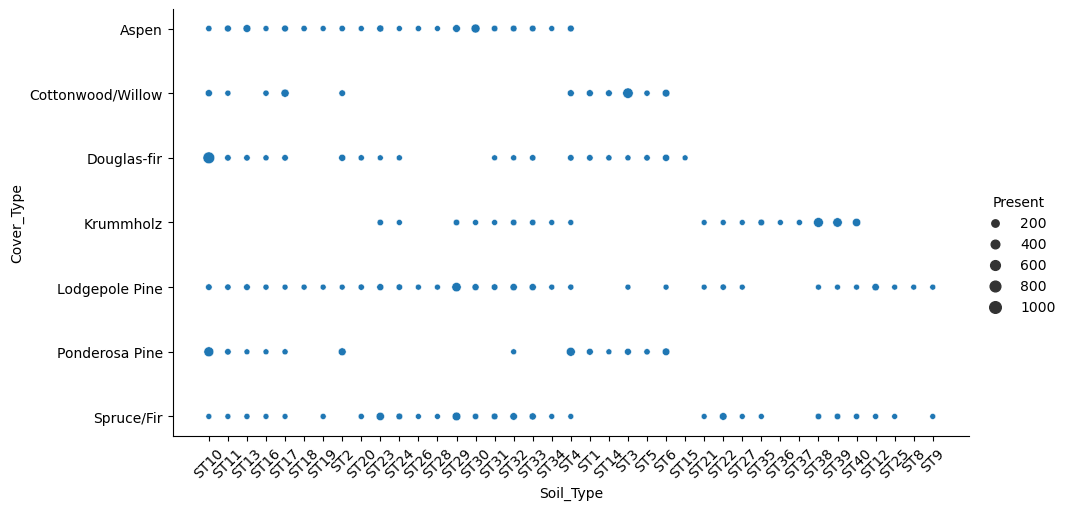

In [25]:
sns_plot = sns.relplot(y="Cover_Type", x="Soil_Type", size = 'Present', data=df3, aspect = 2)
plt.xticks(rotation=45);
sns_plot.savefig("covtype-soil_type.scatter.png", format='png', dpi=72)

**5c.** Explain why it is important to review the scatterplot of "Cover_Type" vs. all the soil types (3 pts).

**Answer:** It is important to take a look a scatterplot to see relationships between variables and see if there are any trends that can be uncovered. However, because soil type and cover type are both categorical variables, a scatterplot might not be the best visualization for these. Perhaps a boxplot or a violin plot with the variable "Present" in the y axis and the "Cover_Type" as x and "Soil_Type" as hue would have been a better visualization 

### 5.2 Review the quantitative data
**5d.** Show the basic summary statistics for the quantitiatve data, excluding the 40 binary soil type columns (3 pts).

In [26]:
num_df = data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
num_df.describe()

Elevation        Aspect         Slope  \
count  14000.000000  14000.000000  14000.000000   
mean    2748.448286    156.840143     16.484214   
std      416.843942    110.071896      8.449539   
min     1879.000000      0.000000      0.000000   
25%     2379.000000     66.000000     10.000000   
50%     2749.500000    126.000000     15.000000   
75%     3110.000000    260.000000     22.000000   
max     3850.000000    360.000000     51.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      14000.000000                    14000.000000   
mean                         227.125571                       50.740714   
std                          206.953721                       60.415508   
min                            0.000000                     -140.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1328.000000                      410.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     14000.000000   14000.000000    14000.000000   
mean                       1721.033786     212.838357      219.095143   
std                        1320.842173      30.507214       22.775140   
min                           0.000000      72.000000       95.000000   
25%                         760.000000     196.000000      207.000000   
50%                        1319.000000     220.000000      223.000000   
75%                        2297.250000     236.000000      235.000000   
max                        6854.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   14000.000000                        14000.000000  
mean      135.038500                         1526.099571  
std        46.110563                         1096.108554  
min         0.000000                            0.000000  
25%       107.000000                          742.000000  
50%       138.000000                         1291.000000  
75%       167.000000                         2003.000000  
max       249.000000                         6938.000000

**5e.** Use the [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of Pandas Dataframes to create a single figure showing the histograms of every quantitative data column excluding the 40 binary soil type columns.  Size the figure to ensure all text is legible. Save the figure to a file named `covtype.histograms.png` for viewing. 

Hint:
- Because you will use the `DataFrame.hist` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.

(5 pts)

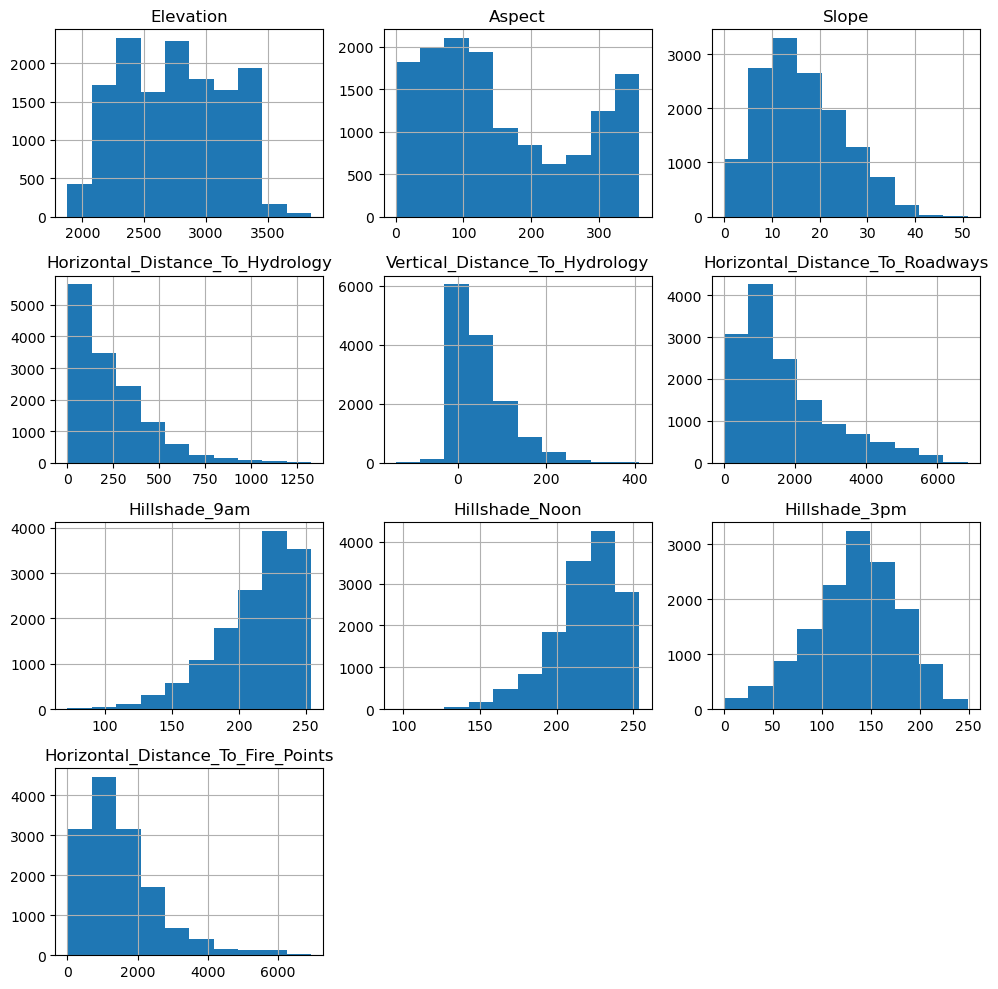

In [27]:
num_df.hist(figsize=(10,10));
plt.tight_layout()
plt.savefig("covtype.histograms.png", format="png", dpi=300)

**5f.** Explain why it is important to examine the histogram of each quantitative column (3 pts).

**Answer:** Histograms are ways that you can see the distribution of your data, you can see if the data mostly follows a normal distribution or if there is some skewness associated with some extreme values. You can also see if the data is unimodal or bimodal

**5g.** Use the Seaborn [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to gererate a scatterplot of every quantitative column (excluding the 40 binary soil type columns) with every other quantitative column.  Use `Cover_Type` as the `hue` argument, use `"kde"` as the `diag_kind` argument, and use `5` as the `height` argument.  Because each scatterplot will be small we need to limit the size and number of points. Otherwise, the points overlap which and will hide the color of those behind.  Include only 1000 randomly selected rows from the dataset.  To further improve the plot we can set the size of the point size using the `plot_kws` argument.  Set it using the dictionary: `{"s": 15}`.

Hint: 
- Use the `qual_cols` argument to only include the list of columns you want to plot.
- Use the `sample` function to limit the number of points.

The plot will be huge! You can view it in the notebook but it will be difficult to read the labels. Therefore, save the figure to a file named `covtype.pairplot.png` for viewing. It will take a few minutes to display the plot.

(5 pts)

In [28]:
# slecting numerical columns to plot and sample of 1000
num2_df = data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type']]
num3_df = num2_df.sample(1000)

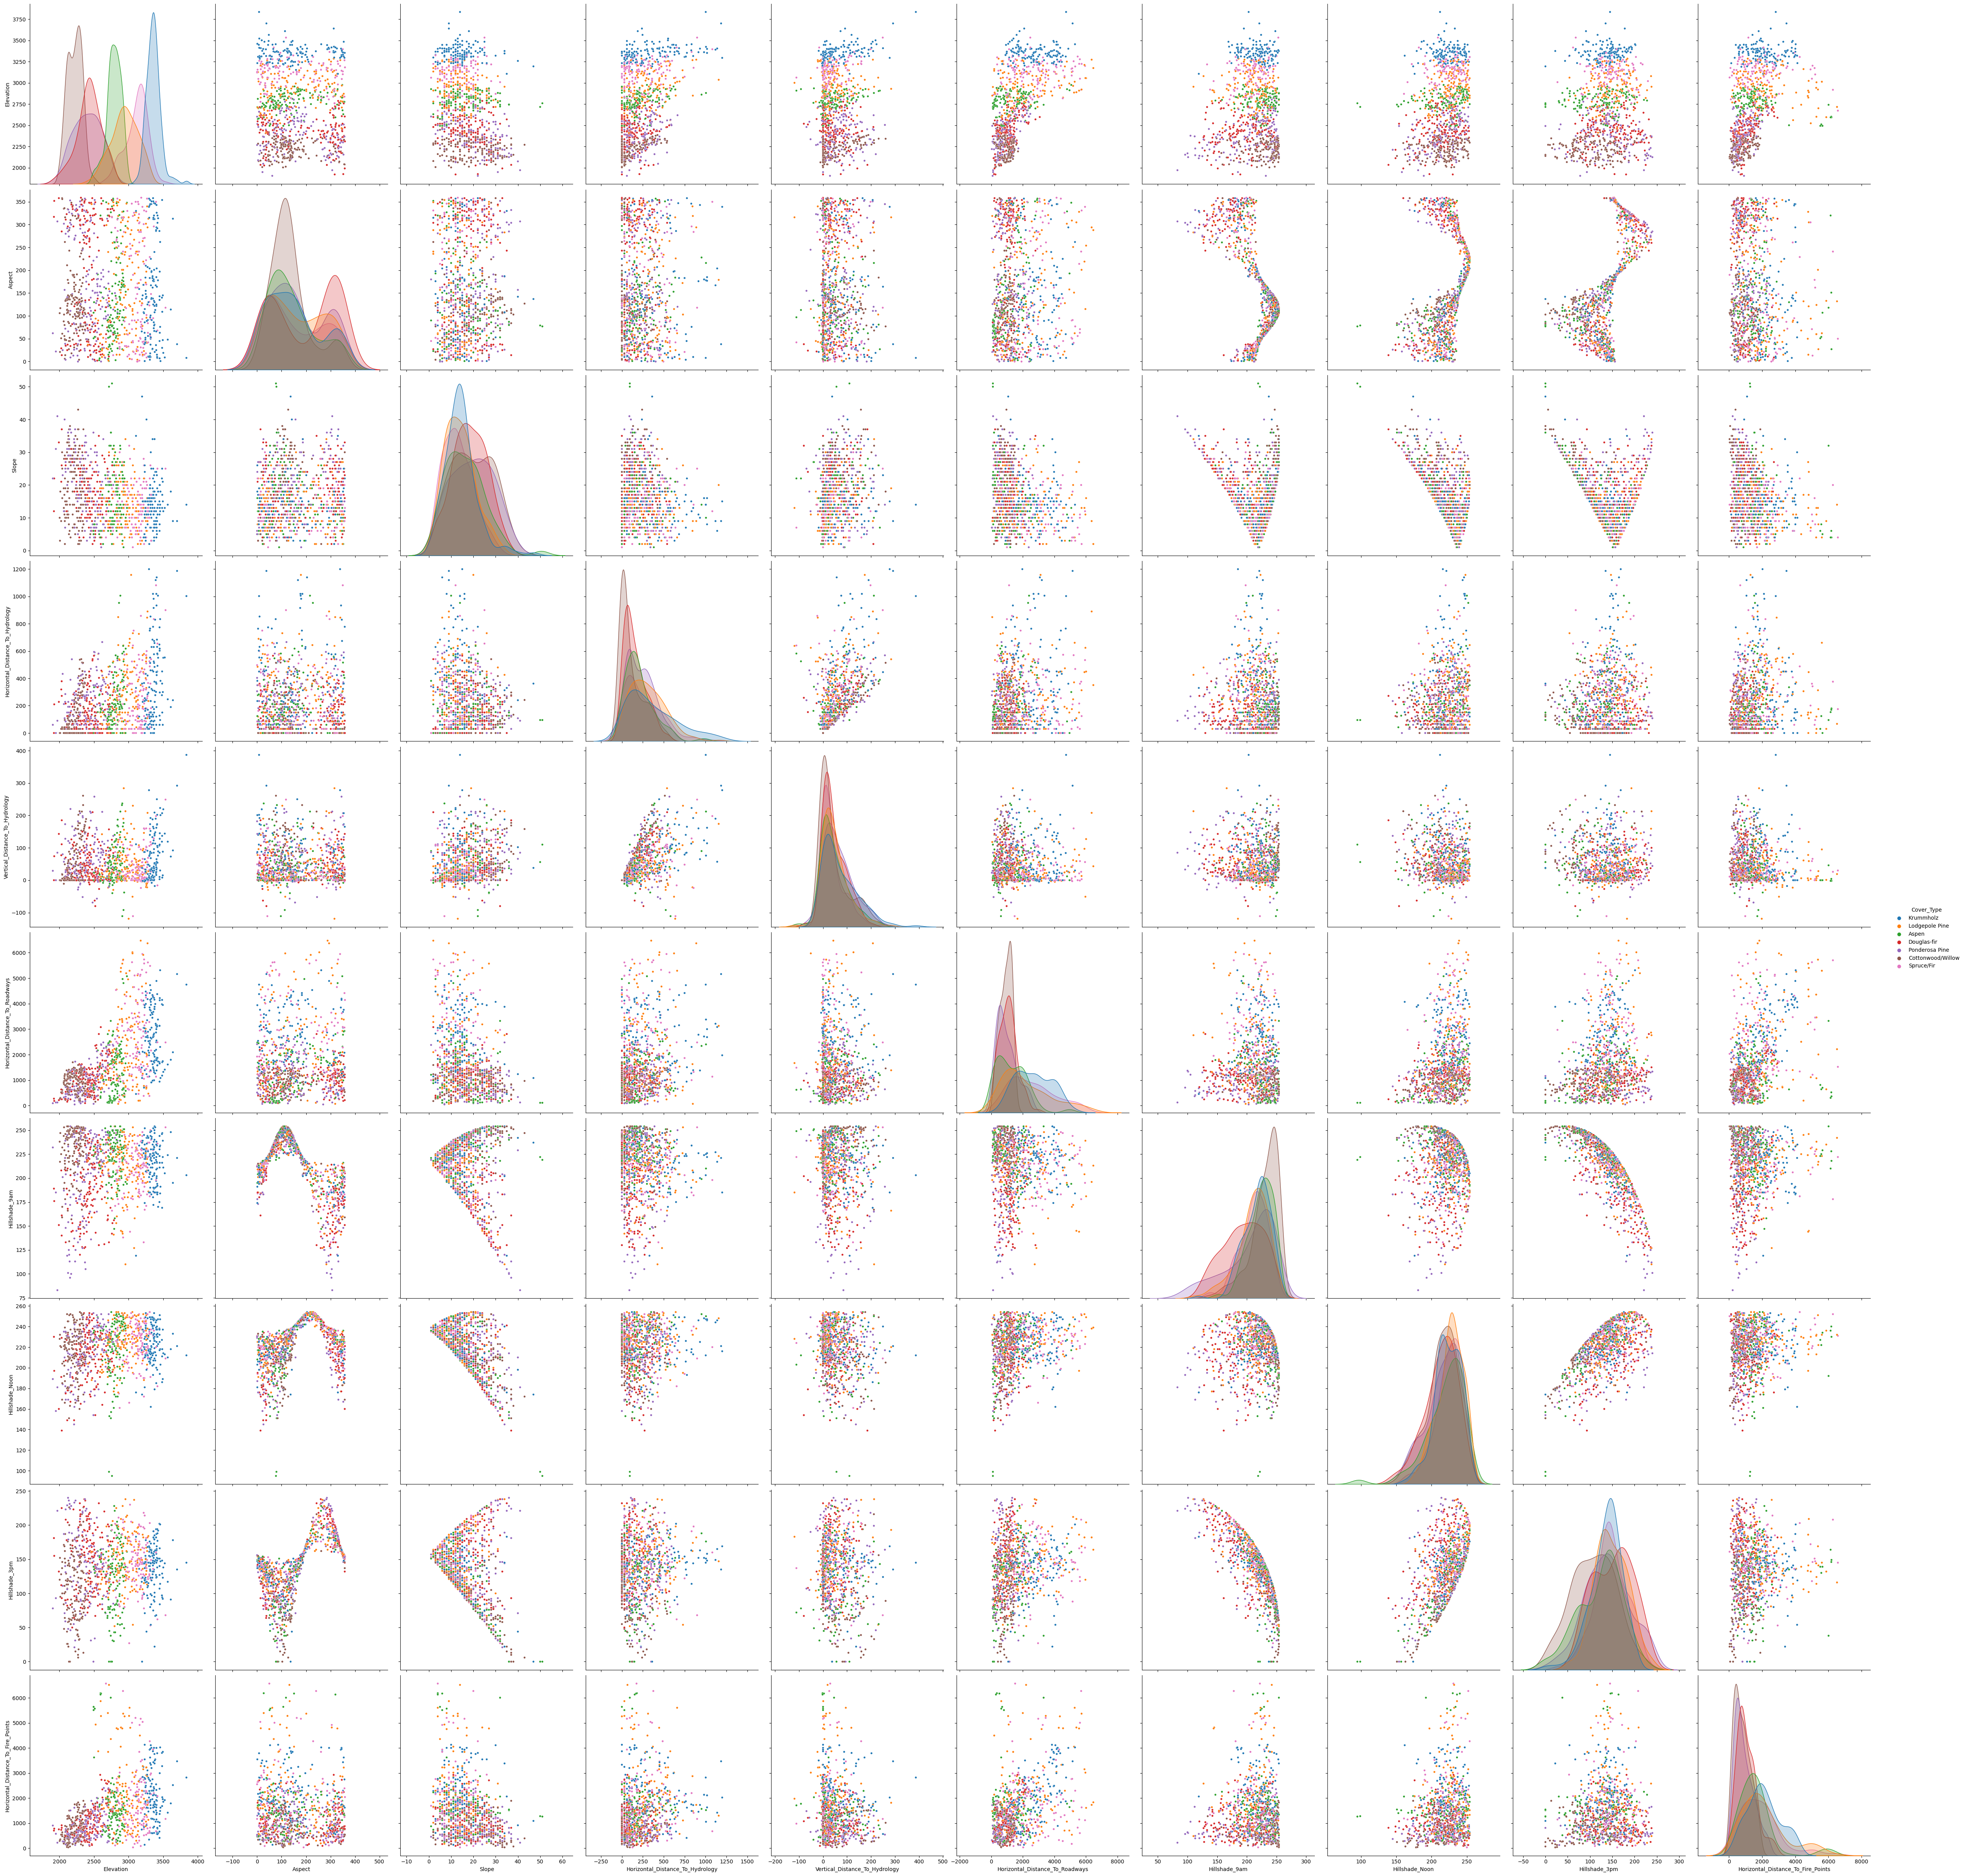

In [29]:
pairplot = sns.pairplot(num3_df,hue = 'Cover_Type', diag_kind = "kde", height = 5, plot_kws={"s": 15});
pairplot.savefig("covtype.pairplot.png", format='png', dpi=72)

**5h.** Explain why it is important to examine the pairwise scatterplots of all quantitative columns  (3 pts).

**Answer:** We need to visualize those data to see if there are specific trends or co-linearity among the numerical variables. Co-linearity might be a issue for some data analytics because it can affect the statistical significance of the independent variables and it makes estimated coefficients too sensitives to changes in the model. By making a pairplot we can quickly assess the existance of colineariry among multiple varibles. 

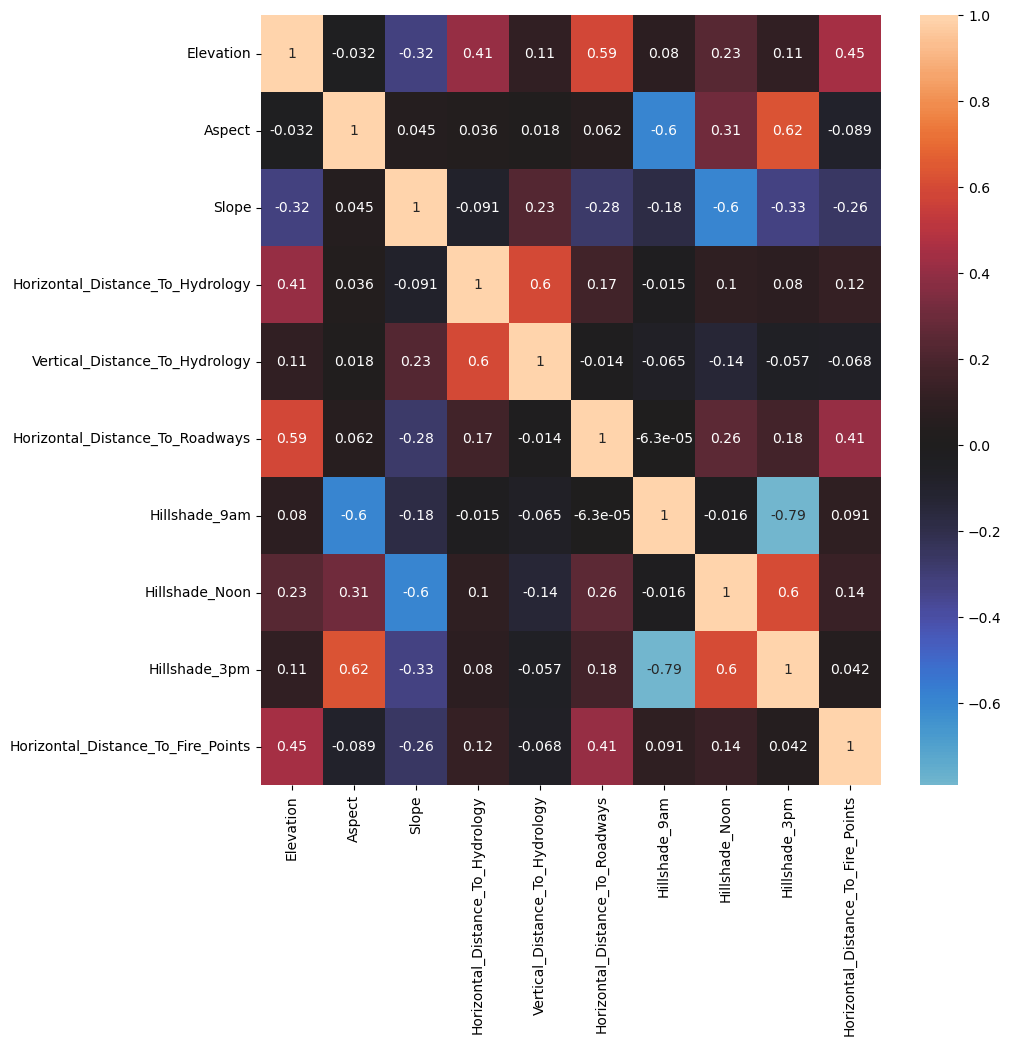

In [30]:
# We can also assess co-linearity by plotting a correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(num3_df.corr(), annot=True, center=0);

**5i.** Create 10 figures such that each figure corresponds to a single quantitative column in the data.  Each figure should contain 7 boxplots, one for each cover type, and should have a title indicating the quantitative column it describes. Save each figure using the naming scheme: `covtype-{column_name}.boxplot.png`. Replace the tag `{column_name}` with the name of the column represented by the figure.  Exclude outliers from the plots.

Hints: 
1. First, group the dataframe by `Cover_type`
2. Second, loop over all the names of quantitative columns.
3. Third, you can create a boxplot using the dataframe summary statistics:
   ```python
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.
   df.describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90);
   ```
4. Because you will use the `DataFrame.plot` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function to save each plot. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.
5. Do not limit the numer of rows as in the pairplot.

(10 pts)

In [31]:
# Name of quantitative columns
qcols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
         
df2 = data.groupby('Cover_Type', as_index=False)
df2.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2898     225      7                                42   
1           2807      61     15                               120   
2           2759     214     31                               150   
3           2771      60     29                               210   
4           2850     317      9                               543   
...          ...     ...    ...                               ...   
12005       3244      40     12                               351   
12006       3343      28     11                               120   
12007       3331      32     16                               218   
12008       3153      17      9                               430   
12009       3217      38     12                                42   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   7                             1691   
1                                  56                             1422   
2                                  68                             1100   
3                                  96                              240   
4                                  98                             2002   
...                               ...                              ...   
12005                              23                             3560   
12006                               8                             3365   
12007                              12                             1772   
12008                              57                             5742   
12009                               4                             1110   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                211             247            173   
1                231             207            105   
2                174             250            194   
3                228             167             52   
4                195             232            176   
...              ...             ...            ...   
12005            221             214            126   
12006            216             215            134   
12007            215             204            121   
12008            213             221            145   
12009            220             214            127   

       Horizontal_Distance_To_Fire_Points  ... ST32 ST33 ST34 ST35 ST36 ST37  \
0                                    1518  ...    1    0    0    0    0    0   
1                                    1248  ...    0    1    0    0    0    0   
2                                    1776  ...    0    0    0    0    0    0   
3                                    1717  ...    0    0    0    0    0    0   
4                                     892  ...    0    0    0    0    0    0   
...                                   ...  ...  ...  ...  ...  ...  ...  ...   
12005                                3871  ...    0    0    0    0    0    0   
12006                                2145  ...    0    0    0    0    0    0   
12007                                4960  ...    0    0    0    0    0    0   
12008                                 990  ...    0    0    0    0    0    0   
12009                                1988  ...    0    0    0    0    0    0   

      ST38 ST39 ST40  Cover_Type  
0        0    0    0       Aspen  
1        0    0    0       Aspen  
2        0    0    0       Aspen  
3        0    0    0       Aspen  
4        0    0    0       Aspen  
...    ...  ...  ...         ...  
12005    0    0    0  Spruce/Fir  
12006    1    0    0  Spruce/Fir  
12007    0    0    0  Spruce/Fir  
12008    0    0    0  Spruce/Fir  
12009    0    0    0  Spruce/Fir  

[70 rows x 55 columns]

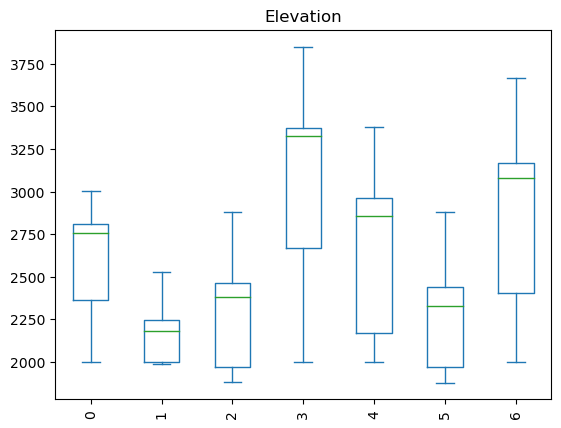

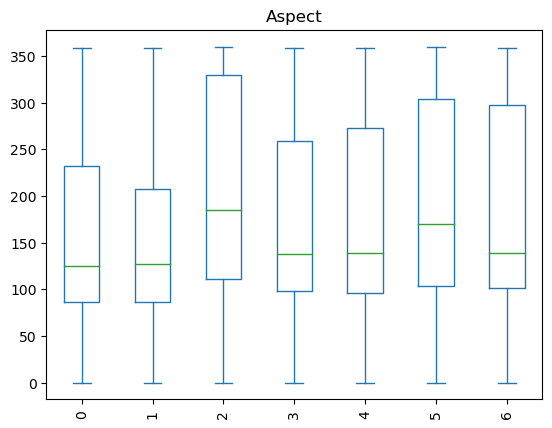

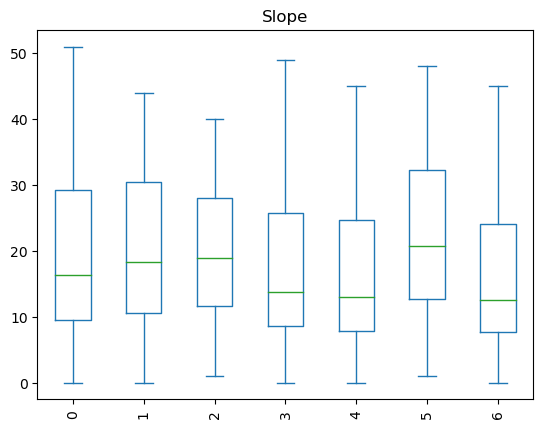

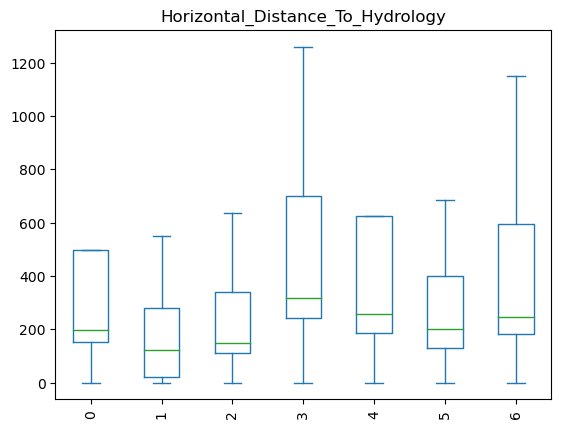

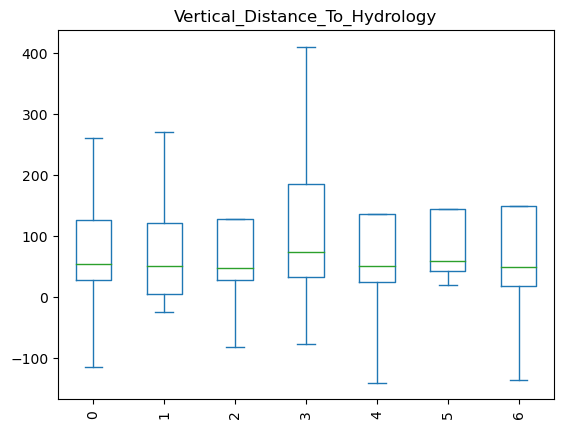

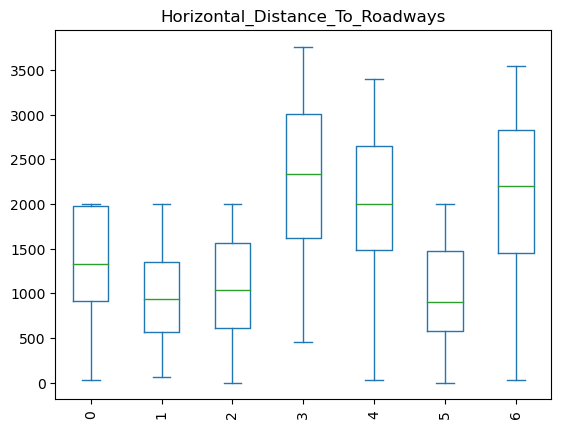

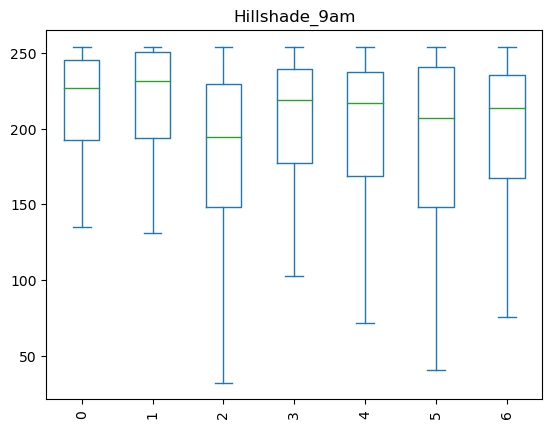

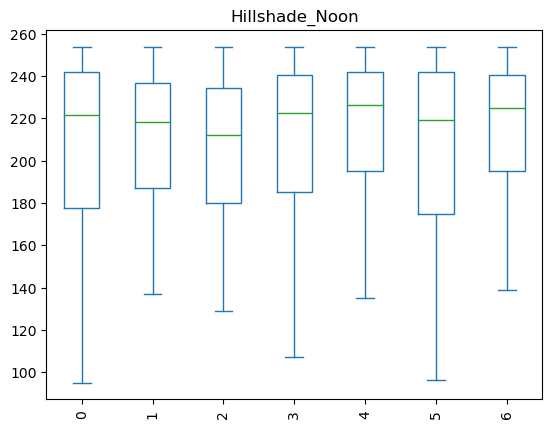

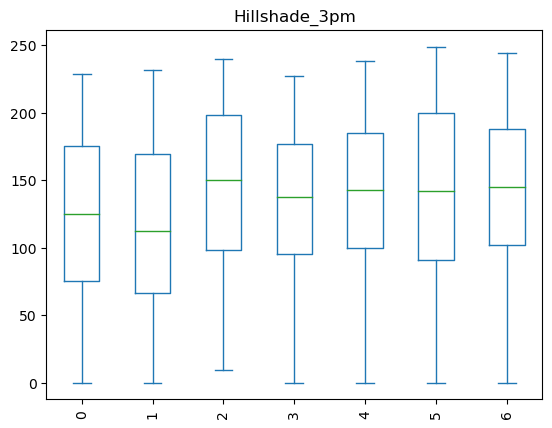

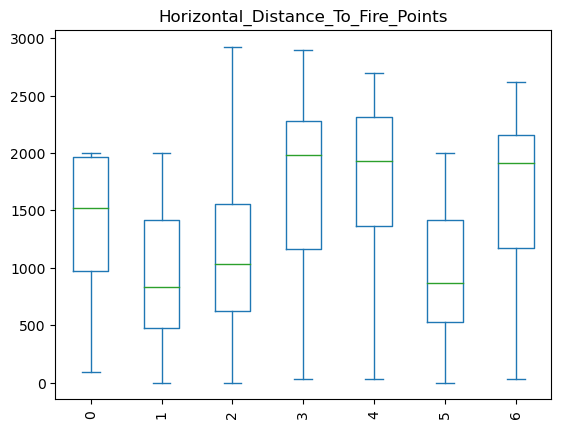

In [32]:
# Loop over the columns 
for x in qcols:
    df = df2[[x]]
    df.describe().transpose().plot(kind="box", title=x, showfliers=False, rot=90);   
    plt.savefig("covtype-"+str(x)+".boxplot.png", format="png", dpi=300)

**5j.** Explain why it is important to review the distribution of the "Cover_Type" column with every other quantitative data column (3 pts).

**Answer:** Boxplots are important visualizations becasuse besides telling you the meadian values and the quartile ranges of your data they also give you a sense of potential outliers in your data. 

### 5.3 Check for outliers

**5k.** Identify if any quantitative columns have outliers. Do this by generating a **single** figure containing one boxplot for each quantitative column (excluding the 40 binary soil type columns). Save the figure as `covtype-outlier_check.png`. Unlike the previous 10 figures you do not need to create separate boxplots by cover type (5 pts).

In [33]:
# Need to make data tidy
dff = pd.melt(num2_df, id_vars=['Cover_Type'], value_vars=qcols,
             var_name='Numeric_Vars', value_name='Values')
dff.head()

Cover_Type Numeric_Vars  Values
0      Aspen    Elevation    2898
1      Aspen    Elevation    2807
2      Aspen    Elevation    2759
3      Aspen    Elevation    2771
4      Aspen    Elevation    2850

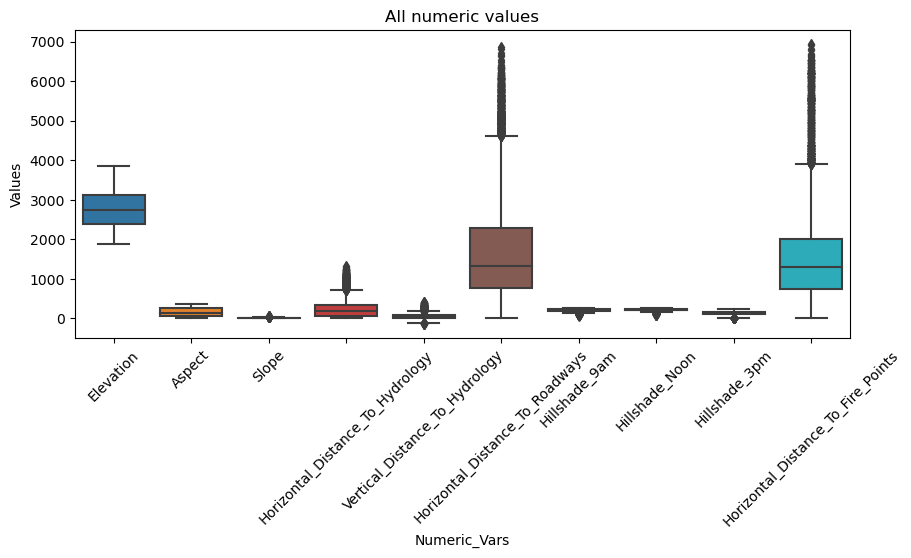

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data = dff, x = 'Numeric_Vars', y = 'Values').set_title('All numeric values');
plt.xticks(rotation=45);
sns_plot.savefig("covtype-outlier_check.png", format='png', dpi=300)

**5l.** Explain why it is important to look for outliers prior to using machine learning techniques (3 pts).

**Answer:** Many machine learning techniques assume the distributions of the data to be between 0 and 1, thus data needs to be normalized before going into the algorithms. If the data has outliers the normalizations that assume only the mean of the data won't be fully representative and more robust methods for normalization need to be taken into consideration. 

---
## 6. Make assumptions

**6a.** Explain which columns of data would be poor predictors of cover type. Justify your answer by referring to the plots from Section 5 (3 pts).

**Answer:** From the pairplots and the correlation matrix we can see that the 3 variables related to hillshade (Hillshade 9 am, noon and 3 pm), as well as Elevation and Horizontal Distance to Roadways, are correlated and could be colinear (linearly correlated) or be related via a polynomial relatioship. Because of this, these might not be good predictors for the cover_type, perhaps limiting the model to only one of these variables might help. In addition we can see that for most Cover Types there seems to be a relationship between the slope, aspect and the Hillshade, while this relationship seems statistically weaker it could cause problems. Finally, Vertical and Horizontal distance to hydrology exhibit co-linearity for which they might be bad predictors in the model. 

**6b.** Write which columns you expect can contribute to prediction of cover type? (3 pts).

**Answer:** Variables with no or weak co-linearity would be the best predictors. In our case for numerical variables it would be Elevation, Aspect*, Slope*, Horizontal Distance to Fire points and either Horizontal or Vertical Distance to Hydorlogy. We would need to pick only one Hillshade variable due to colinearity, I will pick Hillshade Noon since it is in between 9 and 3 pm. We could also use categorical variables into the ML model but we would need to ensure that these are all numeric in the forms of zeros and ones. Since our data is already like that, we could use the soil types and the wilderness areas as predictors for the ML model as well. 


text* Denotes weak co-linearity. 

---
## 7. Perform Supervised Machine Learning
### 7.1 Prepare the Data

**7a.** Create a subset of the original data that contains only the columns you indicated in task 6b and the `Cover_Type` column.  Print the list of remaining columns to verify the dataframe has the columns you want to keep:

Hint:
- Drop all column from the dataset not deemed predictive.

(3 pts)

In [35]:
datml = data.drop(['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am','Hillshade_3pm', 'Cover_Type'], axis = 1)

datml.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Hillshade_Noon  \
0       2898     225      7                                42             247   
1       2807      61     15                               120             207   
2       2759     214     31                               150             250   
3       2771      60     29                               210             167   
4       2850     317      9                               543             232   
5       2845      64     20                               553             196   
6       2617     152     15                                90             239   
7       2571     342      6                               192             231   
8       2553      10     17                               108             204   
9       2942     103     16                                90             217   

   Horizontal_Distance_To_Fire_Points Rawah Neota Comanche_Peak  \
0                                1518     0     0             1   
1                                1248     0     0             1   
2                                1776     0     0             1   
3                                1717     1     0             0   
4                                 892     0     0             1   
5                                2402     1     0             0   
6                                1471     0     0             1   
7                                1732     0     0             1   
8                                1224     0     0             1   
9                                2065     1     0             0   

  Cache_la_Poudre  ... ST31 ST32 ST33 ST34 ST35 ST36 ST37 ST38 ST39 ST40  
0               0  ...    0    1    0    0    0    0    0    0    0    0  
1               0  ...    0    0    1    0    0    0    0    0    0    0  
2               0  ...    0    0    0    0    0    0    0    0    0    0  
3               0  ...    0    0    0    0    0    0    0    0    0    0  
4               0  ...    0    0    0    0    0    0    0    0    0    0  
5               0  ...    0    0    0    0    0    0    0    0    0    0  
6               0  ...    0    0    0    0    0    0    0    0    0    0  
7               0  ...    0    0    0    0    0    0    0    0    0    0  
8               0  ...    0    0    0    0    0    0    0    0    0    0  
9               0  ...    0    0    0    0    0    0    0    0    0    0  

[10 rows x 50 columns]

In [36]:
# Need to remember to change the categorical variables back to numbers since we made them strings 
datml[categorical_columns] = datml[categorical_columns].astype(int)

In [37]:
# Check types
datml.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Hillshade_Noon                        int64
Horizontal_Distance_To_Fire_Points    int64
Rawah                                 int32
Neota                                 int32
Comanche_Peak                         int32
Cache_la_Poudre                       int32
ST1                                   int32
ST2                                   int32
ST3                                   int32
ST4                                   int32
ST5                                   int32
ST6                                   int32
ST7                                   int32
ST8                                   int32
ST9                                   int32
ST10                                  int32
ST11                                  int32
ST12                                  int32
ST13                            

**7b.** For machine learning we need to separate the column containing our dependent variable `Cover_Type` from the independent variables.  Create a Numpy array containing the dependent variable `Cover_Type`. Name it `Y` (3 pts).

In [38]:
Y = data['Cover_Type'].values
Y[0:10] # Display the fist 10 elements

array(['Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen', 'Aspen',
       'Aspen', 'Aspen', 'Aspen'], dtype=object)

**7c.** Create a 2D numpy array containing only the independent variables (i.e. all of the predictive columns). Name it `X` (3 pts).

In [39]:
X = datml.loc[:,'Elevation':'ST40'].values
X[0:10] #Display the fist 10 elements

array([[2898,  225,    7,   42,  247, 1518,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0],
       [2807,   61,   15,  120,  207, 1248,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0],
       [2759,  214,   31,  150,  250, 1776,    0,    0,    1,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

### 7.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns have a mean centered at 0 with data points scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for Sklearn.

**7d**.  Normalize the `X` dataframe using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. (5 pts).

In [40]:
# Choosing the robust method for normalization because the histograms show that not all
#the data is normally distributed and some variables like Horizontal distance to hydrology
#and Hillshade have potential outliers
X = preprocessing.robust_scale(X)

# Check that the values are distributed from -1 to 1
X[0:10]

array([[ 0.20314637,  0.51030928, -0.66666667, -0.52471483,  0.85714286,
         0.18001586,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.07865937, -0.33505155,  0.        , -0.22813688, -0.57142857,
        -0.03409992,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.

### 7.3 Split the data for testing and validation

**7e.** Use Sklearn to create a testing model by dividing the two numpy arrays into two groups, one with 80%, which will be used for training the models, and one with 20%, which will be used for validating the models.  A random seed is required. Use a seed  of `7`.  Name your trainig sets `Xt` and `Yt` and the validation sets `Xv` and `Yv` respectively (3 pts).

In [41]:
# Training validation dataset
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

**7f.** We want to perform a 10-fold cross-validation scheme to estimate accuracy.  This will split our training dataset into 10 pieces, train on 9, test on 1 and repeat for all combinations.  Create a KFold model object for use later when running the machine learning alogrithms. Use a random state seed of `7`.  Name the KFold object `kfold` (3 pts).

In [42]:
# Kfold with seed 7
kfold = model_selection.KFold(n_splits=7)

### 7.3 Evaulate ML approaches
Using the training data created in task 7e and the KFold model created in task 7f, we will now execute a variety of ML algorithms.

**7g**. First, we want to store the results of all ML algorithms that we'll be using. Remember we'll be performing  a 10-fold cross-validation scheme so this will yield 10 results for each algorithm.   You will store the results of each ML algorithm into its approriate element of the dictionary.  Execute the following code to initialize a python dictionary where results will be stored.

```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
```
(3 pts)

In [43]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}

**7h.** Create two variables. One named `scoring` and the other `error_score`.  Set the value of `scoring` to `"accuracy"` and the `error_score` to `np.nan`. You will use these two variables for model section of every ML method below (3 pts).

In [44]:
scoring="accuracy"
error_score=np.nan

**7i.** Execute the `LogisticRegression` algorithm and save the results in the `results` dictionary.  Use the following arguments:  `solver` as `"lbfgs"` and  `multi_class` as `"auto"` (3 pts).

In [45]:
# LogisticRegression
alg = LogisticRegression(solver='lbfgs', multi_class="auto", max_iter=1000)

# run and save results in results variable
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)
# Look at model outputs
results['LogisticRegression']

array([0.6625  , 0.691875, 0.675   , 0.691875, 0.67875 , 0.675625,
       0.691875])

**7j.** Execute the `KNeighborsClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [46]:
# KNeighborsClassifier 
alg = KNeighborsClassifier()

# Run and save in results
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Look at results
results['KNeighborsClassifier']

C:\Users\gara009\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gara009\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

array([0.735   , 0.7425  , 0.734375, 0.761875, 0.739375, 0.73    ,
       0.751875])

**7k.** Execute the `LinearDiscriminantAnalysis` algorithm and save the results in the `results` dictionary (3 pts).

In [47]:
# LinearDiscriminantAnalysis 
alg = LinearDiscriminantAnalysis()

# Run and save in results
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

# Look at the results
results['LinearDiscriminantAnalysis']

array([0.6025  , 0.63125 , 0.623125, 0.645   , 0.6275  , 0.64    ,
       0.619375])

**7l.** Execute the `DecisionTreeClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [48]:
# DecisionTreeClassifier
alg = DecisionTreeClassifier()

# Run and save in results
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Look at results
results['DecisionTreeClassifier']

array([0.74    , 0.7425  , 0.74875 , 0.759375, 0.76375 , 0.743125,
       0.753125])

**7m.** Execute the `GaussianNB` algorithm and save the results in the `results` dictionary (3 pts).

In [49]:
# GaussianNB
alg = GaussianNB()

# Run and save in results
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Look at the results.
results['GaussianNB']

array([0.433125, 0.45375 , 0.440625, 0.46125 , 0.44125 , 0.454375,
       0.469375])

**7n.** Execute the `SVC` algorithm and save the results in the `results` dictionary. Use `auto` as the the `gamma` arument (3 pts).

In [50]:
# SVC 
alg = SVC(gamma='auto')

# Run and save in results
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Look at results
results['SVC']

array([0.64625 , 0.67875 , 0.65625 , 0.684375, 0.66    , 0.659375,
       0.648125])

**7o.** Create a figure of boxplots that shows the distribution of results from each method. Save the figure using the name `covtype.ML_results.png` (5 pts).

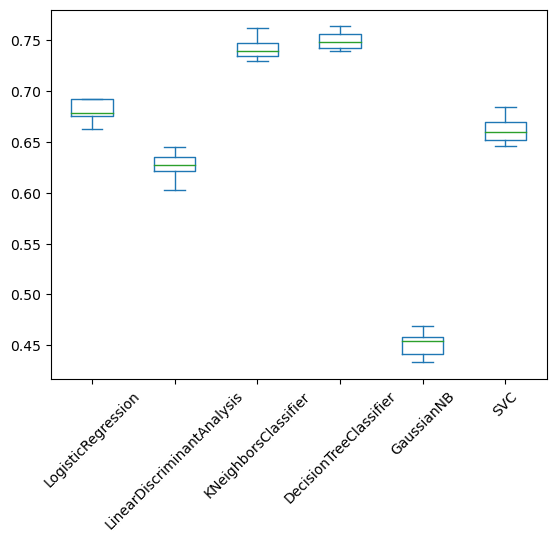

In [51]:
pd.DataFrame(results).plot(kind="box", rot=45);
plt.savefig("covtype.ML_results.png", format="png", dpi=300)

**7p.** Write which algorithm you feel performed the best and explain (3 pts).

**Answer:** From the boxplot we can see that the DecisionTreeClassifier performed the best because it has the highest score. KNeighborsClassifier was a very close second but the variability in the low end of the boxplot made me think that the DecissionTree was a better option. The goal is to get a score as close to 1 as possible. When looking at the outputs of all the models you can tell that none of these are super optimal but the Decission Tree is the best with KNeighnors being the second best.

### 7.4 Make Predictions!

**7q.** Using the algorithm that performs the best, use it to make a prediction using the `Xv` validation we set aside earlier (5 pts).

In [52]:
# Creating an object for the best model
alg = DecisionTreeClassifier()

# Use traing data to create a new model
alg.fit(Xt, Yt)

# Make cover type predictions using valudation dataset
predictions = alg.predict(Xv)

# print predictions
predictions

array(['Cottonwood/Willow', 'Aspen', 'Krummholz', ..., 'Douglas-fir',
       'Douglas-fir', 'Aspen'], dtype=object)

**7r**.  Show the accuracy score of the prediction (4 pts).

In [53]:
# Accuracy score
accuracy_score(Yv, predictions)

0.7389285714285714

**7s** Show the confusion matrix.  Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [54]:
labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'] # Unique cover types
cm = confusion_matrix(Yv, predictions, labels=labels)
print(cm)

[[242 100   1   0  16   0  27]
 [119 209  15   0  56   8   4]
 [  0  13 271  22   9  81   0]
 [  0   0  18 378   0   9   0]
 [ 19  50   4   0 309   2   2]
 [  2  12  70  17   7 301   0]
 [ 35  13   0   0   0   0 359]]


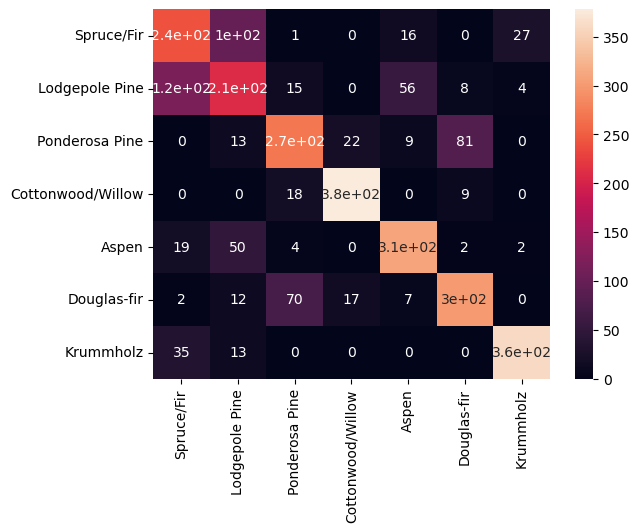

In [55]:
# Also plotting the heatmap for better visualization and interpretation
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

**7t.** Print the classifcation report. Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [56]:
cr = classification_report(Yv, predictions)
print(cr)

                   precision    recall  f1-score   support

            Aspen       0.78      0.80      0.79       386
Cottonwood/Willow       0.91      0.93      0.92       405
      Douglas-fir       0.75      0.74      0.74       409
        Krummholz       0.92      0.88      0.90       407
   Lodgepole Pine       0.53      0.51      0.52       411
   Ponderosa Pine       0.72      0.68      0.70       396
       Spruce/Fir       0.58      0.63      0.60       386

         accuracy                           0.74      2800
        macro avg       0.74      0.74      0.74      2800
     weighted avg       0.74      0.74      0.74      2800



## 8. Summarize

**8a**.  Explain in your own words the meaning of the results in last three cells of Section 7. How well did the algorithm perform? (3 pts).

**Answer:** I think overall this model did not preformed great since the accuracy score was ~0.7. A good model has an overall accuracy that is as close to 1 as possible. However, the model had great success at predicting cover type for specific classes, for example Krummholz and Cottonwood/Willow had both precision, recall and f1-score values ~0.9 meaning that the model was good at not misslabeling other classes as these ones (precision) and also was good at classifying the areas that belonged to this cover type correctly (recall). The model had a harder time at correctly predicting Spruce/Fir and Lodgepole Pine, where both of these had precision, recall and f1-scores lower than 0.65. From the confusion matrix we can see that the model had a hard time diferentiating between both of these classes. In real life these 2 vegetation types look very similar with most of the differences coming from the shape of the needles. I would expect that overall these 2 classes would have shared physical attributes from the ones that were inputed into the ML model which might be a reason why the model could not predictem correctly. 

**8b.** Write if there anything you would do differently to try to improve the quality of the prediction (3 pts).

**Answer:** The quality of the predictions could be improved two ways, from a data perspective and from a computational perspective. 
- Data: We can imporve the predictions by adding more training points in areas where the model had a harder time performing accurate predictions (e.g., Spruce/Fir and Lodgepole Pine)
- Data: More data could be collected using a different sampling scheme and ground truth methods that would ensure random sampling across all the areas
- Computational: Perform hyperparameter tunning
- Computational: Increase the number of folds in your cross-validation